## Introduction to Modeling



---



### Demonstrate idea behind MSE

Complete below



---



### Linear regression

**Simple Example with Simulated Data**

For this example, we are going to keep it simple, stay in 2 dimensions, and use OLS to fit a line to some data.

In [ ]:
import numpy as np
%matplotlib inline
# this accommodates high resolution displays
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [ ]:
n = 10
np.random.seed(146)
x = np.random.normal(size=(n,1))

In [ ]:
noise_strength = 0.5
np.random.seed(147)
noise = np.random.normal(scale=noise_strength, size=(n,1))
y = 1 + 2*x + noise
plt.scatter(x,y, label='Original data', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression as LR


In [ ]:
lin_reg = LR()
lin_reg.fit(x,y)

LinearRegression()

In [ ]:
np.shape(lin_reg.coef_)
print(lin_reg.coef_)

In [ ]:
print('Model coefficient: ', lin_reg.coef_[0][0])
print('Model intercept: ', lin_reg.intercept_[0])
#y = 1.17 + 2.20x

In [ ]:
x

In [ ]:
y_pred = lin_reg.predict(x)
y_pred

In [ ]:
#What do you notice?
for i in range(len(y)):
    print(y[i], y_pred[i])

In [ ]:
x_range = [min(x), max(x)]
y_pred = lin_reg.predict(x_range)

plt.figure(figsize = (10,6))
plt.scatter(x,y, label='Original data', color='k')
plt.plot(x_range, y_pred, label='Model', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can use the model to make predictions for new x values:

In [ ]:
np.random.seed(201)
new_x = np.random.normal(size=(20,1))
y_pred = lin_reg.predict(new_x)

plt.scatter(x,y, label='Original data', color='k')
plt.scatter(new_x, y_pred, label='Predicted values', color='r')
plt.title('Our randomly generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Why did the model pick the line that it did? The goal was to minimize the sum of the squared errors between the model and the data. Let's plot the errors:

In [ ]:
def VizSquaredErrors(x,y,model):
    # Function will plot x and y, show the best fit line as well as the squared errors, and return the raw error terms

    # Fit the model and plot the data
    model.fit(x,y)
    yp = model.predict(x)
    errors = abs(y - yp)
    plt.scatter(x,y,color='black',label='Actual Data')

    # Compute a range of x values to plot the model as a continuous line
    x_rng = np.linspace(min(x),max(x),20)
    y_pred = model.predict(x_rng)
    plt.plot(x_rng,y_pred,color='red',label='Fitted Model')

    # Draw squares at each data point indicating the squared error
    ax = plt.gca() #get current axis
    for i,xi in enumerate(x):
        r = plt.Rectangle((xi, min(y[i],yp[i])),width=errors[i],height=errors[i],facecolor='blue',fill=True,alpha=0.1)
        ax.add_patch(r) #in this case a square
    plt.axis('equal')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()
    return errors

In [ ]:
VizSquaredErrors(x,y,lin_reg)

The red line is the line that minimizes the sum of the squared errors between the model and the data.  That is, **it makes the total area of all the blue squares as small as possible**.



---



### Scoring the model

The score of a model refers to how well the model fits the data.  There is also usually more than one way to score a model!

**Mean-squared error (MSE)** is one way to score a model like this, and it is pretty easy to compute.  It is exactly what it sounds like - it is the mean of the squared errors!

We could calculate this by hand:

In [ ]:
#We will recreate the model just in case we ran other code in between
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)
errors = y-y_pred
mse = np.mean(errors**2)
mse

Or use scikit-learn:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = lin_reg.predict(x)
mse = mean_squared_error(y, y_pred)
print(mse)

MSE is useful for comparing between models, but we only have one model with nothing to compare it to!

The default scoring method that is used when we call lin_reg.score(x,y) is called $R^2$, or the **coefficient of determination**.

In [ ]:
print('Model score: ', lin_reg.score(x,y))
print('Model MSE: ', mean_squared_error(lin_reg.predict(x),y))

**The coefficient of determination is the correlation coefficient squared in simple linear regression**




In [ ]:
r = np.corrcoef(x,y,rowvar=False)[0][1] #rowvar=False indicates that the input variables are stored as columns, not as rows
r

In [ ]:
print(r**2)



---



### Complete in Class: Polynomial Regression


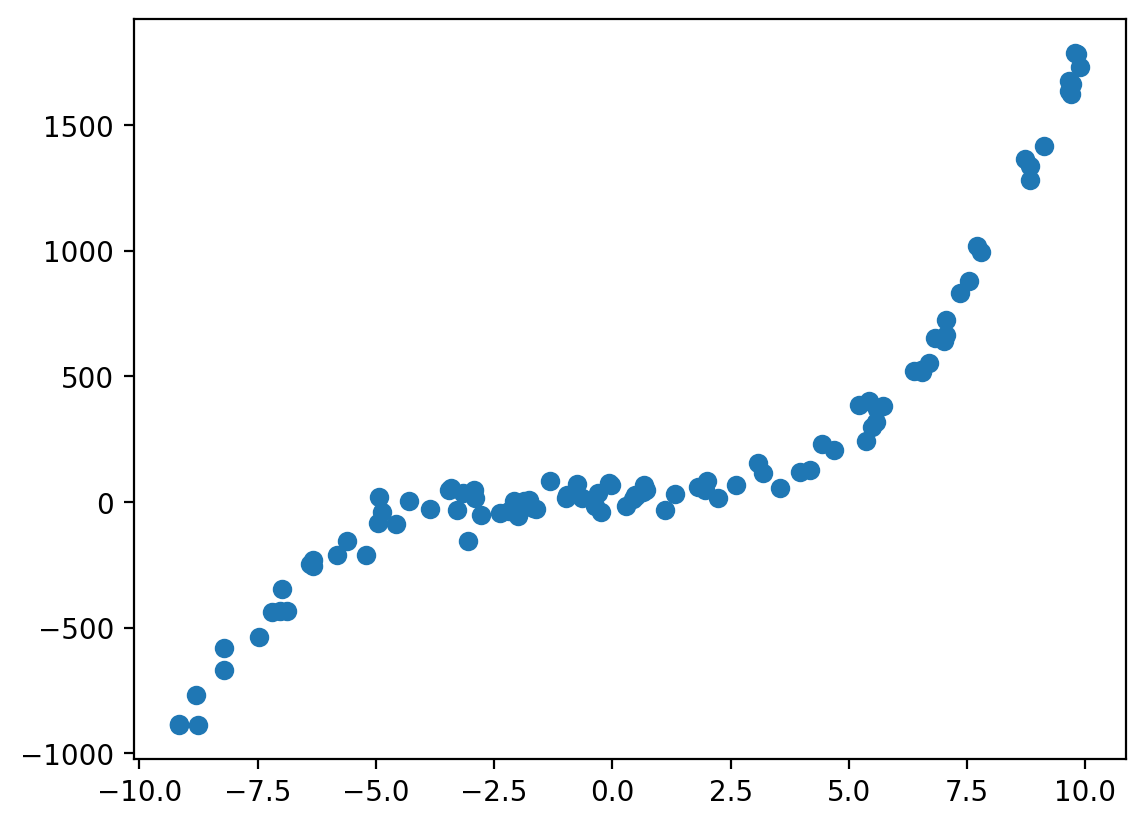

In [ ]:
b = 10
a1 = 2
a2 = 3
a3=1.5

n_examples = 100

X = np.random.uniform(-10,10, n_examples)


y = b +a1*X + a2*X**2 + a3*X**3 + np.random.normal(0,50,n_examples)

plt.scatter(X,y)


In [ ]:
# let's see if we can fit it with a linear regression using sklearn


# declare how many input features for linear model





In [ ]:
poly_reg.intercept_

In [ ]:
poly_reg.coef_


In [ ]:
plt.scatter(X,y)

# make a dotted curve for fit predictions
Xt = np.linspace(X.min(), X.max(), 1000)
Xt1 = Xt.reshape(-1,1)
Xt2 = Xt1**2
Xt3 = Xt1**3
Xt123 = np.concatenate([Xt1,Xt2,Xt3], axis=1)
plt.plot(Xt, poly_reg.predict(Xt123), color='r', linestyle='--', linewidth=2) #line width




---



### OLS on real data (Multiple linear regression)

In [ ]:
import pandas as pd
concrete = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [ ]:
concrete

In [ ]:
concrete.columns = [item.split('(')[0].rstrip().replace(' ','_') for item in concrete.columns]

In [ ]:
concrete.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
import seaborn as sns
sns.stripplot(data = concrete, orient = 'h')

In [ ]:
X = concrete.drop(columns = 'Concrete_compressive_strength')

In [ ]:
y = concrete['Concrete_compressive_strength']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_reg = LR()
lin_reg.fit(X_train_scaled,y_train)
print(lin_reg.score(X_train_scaled,y_train))
print(lin_reg.score(X_test_scaled,y_test))

We will compare the predicted values to the actual values we had for y. What does it mean to make a prediction?

In [ ]:
lin_reg.coef_

In [ ]:
lin_reg.intercept_

In [ ]:
X.columns

In [ ]:
X.head()

In [ ]:
X.iloc[0]

In [ ]:
obs = np.array(X.iloc[0]).reshape(1,-1)
print(obs)

obs = scaler.transform(obs)

print(obs)
print('Coefficients:',lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print(sum(obs * lin_reg.coef_) + lin_reg.intercept_)

In [ ]:
lin_reg.predict(obs)

array([52.43959381])

In [ ]:
y_pred = lin_reg.predict(X_train_scaled)

plt.figure(figsize=(8,8))
plt.scatter(y_train, y_pred, alpha=0.5, ec='k')
plt.plot([min(y), max(y)],[min(y),max(y)], ':k')
plt.axis('equal')
plt.xlabel('Actual Compressive Strength', fontsize=14)
plt.ylabel('Predicted Compressive Strength', fontsize=14)
plt.show()

--

























--

















---



### Digression on Epistemic and Aleatoric

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

# Enable inline plotting in Jupyter
%matplotlib inline

# Parameters for the target and darts
target_center = np.array([0, 0])  # True center of the target

# Simulation parameters
n_darts = 60  # Number of darts to throw
high_precision_var = 0.15  # Low variance for high precision darts
low_precision_var = 0.75  # High variance for low precision darts
high_accuracy_offset = np.array([0, 0])  # No offset for high accuracy
low_accuracy_offset = np.array([2, 2])  # Offset for low accuracy (epistemic uncertainty)

# Function to generate darts with precision and accuracy
def generate_darts(accuracy_offset, precision_var):
    return np.random.randn(n_darts, 2) * precision_var + accuracy_offset

# Suppress initial plot creation by using a context where we don't show output
plt.ioff()  # Turn off interactive plotting

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')

# Target center visualization
target = plt.Circle(target_center, 0.05, color='red', label='True Target')
ax.add_artist(target)

# Initialize scatter plot for darts
darts_plot = ax.scatter([], [], s=50, c='blue', alpha=0.7)

# Function to initialize the plot
def init():
    darts_plot.set_offsets(np.empty((0, 2)))
    return darts_plot,

# Function to update the dart positions for each frame
def update(frame):
    ax.clear()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')

    # Vary the frame between different types of darts (precision and accuracy)
    if frame < 30:
        # High Precision, Low Accuracy (Epistemic Uncertainty)
        darts = generate_darts(low_accuracy_offset, high_precision_var)
        ax.set_title('High Precision, Low Accuracy (Epistemic Uncertainty)')
    else:
        # High Accuracy, Low Precision (Aleatoric Uncertainty)
        darts = generate_darts(high_accuracy_offset, low_precision_var)
        ax.set_title('High Accuracy, Low Precision (Aleatoric Uncertainty)')

    # Redraw the target
    ax.add_artist(plt.Circle(target_center, 0.05, color='red', label='True Target'))

    # Update the dart positions
    darts_plot = ax.scatter(darts[:, 0], darts[:, 1], s=50, c='blue', alpha=0.7)

    return darts_plot,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(60), init_func=init, blit=False, repeat=True)

# Save the animation as a gif file
ani.save("darts_simulation.gif", writer=PillowWriter(fps=5))

# Turn back on interactive plotting to ensure the animation shows up correctly
plt.ion()

# Display the gif in the notebook
Image(filename="darts_simulation.gif")
